# eda006

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

## データセットの読み込み

In [2]:
input_path = Path("../input")

train_df = pd.read_parquet(input_path / "train.parquet")
test_df = pd.read_parquet(input_path / "test.parquet")

## EDA

datetime(日時)：日付 + 時間(1時間ごとに1data)\
season(季節)：1 = 春, 2 = 夏, 3 = 秋, 4 = 冬\
holiday(祝日)：0 = 祝日ではない, 1 = 祝日\
workingday(労働日)：0 = 休日または休暇, 1 = 労働日\
weather(天気)：\
1: 快晴, 雲が少ない, 部分的に曇り, 部分的に曇り\
2：霧＋曇り、霧＋雲切れ、霧＋雲少、霧\
3: 小雪、小雨+雷雨+雲が散らばる、小雨+雲が散らばる\
4：大雨＋氷霰＋雷雨＋霧、雪＋霧\
temp(気温)：摂氏温度\
atemp(体感気温)：摂氏の感じる温度\
humidity(湿度)：相対湿度\
windspeed(風速)：風速\
casual(非登録ユーザーの利用数)：非登録ユーザーの利用数\
registered(登録ユーザーの利用数)：登録ユーザーの利用数\
count(総利用数)：総利用数


In [23]:
datetime = pd.to_datetime(train_df["datetime"])

train_df["year"] = datetime.dt.year
train_df["month"] = datetime.dt.month
train_df["day"] = datetime.dt.day
train_df["hour"] = datetime.dt.hour
train_df["dayofweek"] = datetime.dt.day_name()

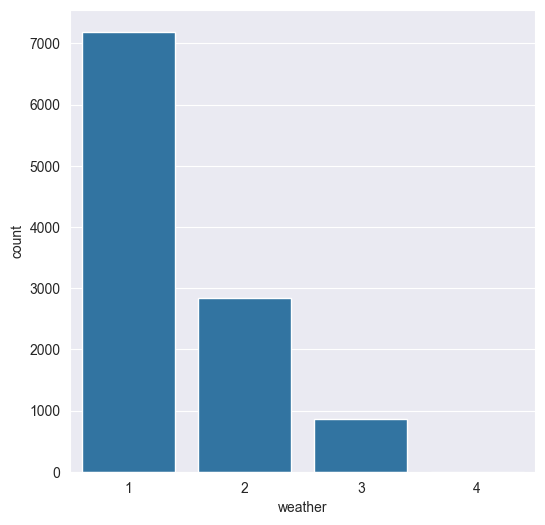

In [12]:
plt.figure(figsize=(6, 6))
sns.countplot(x="weather", data=train_df)
plt.show()

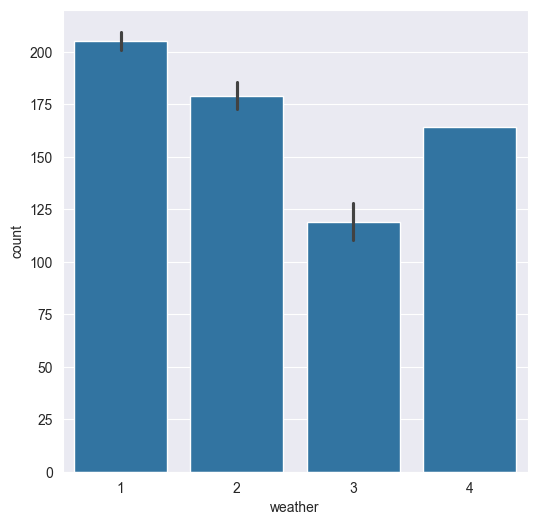

In [9]:
plt.figure(figsize=(6, 6))
sns.barplot(x="weather", y="count", data=train_df)
plt.show()

データ的にはほぼ快晴の日が多い。\
weather=4のデータは一つしかない？エラーバーがない。\
→ 一つしかない、直観だと大雨の日の利用数は少なくなるはず。\
→ 最悪、このデータを適当な値に変換する、もしくは削除する。\
→ test_dfの中身確認する必要あり。\
  →　２つ存在する。

In [18]:
train_df["weather"].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

In [19]:
test_df["weather"].value_counts()

weather
1    4221
2    1710
3     560
4       2
Name: count, dtype: int64

In [21]:
test_weather_4 = test_df[test_df["weather"] == 4]
test_weather_4

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980


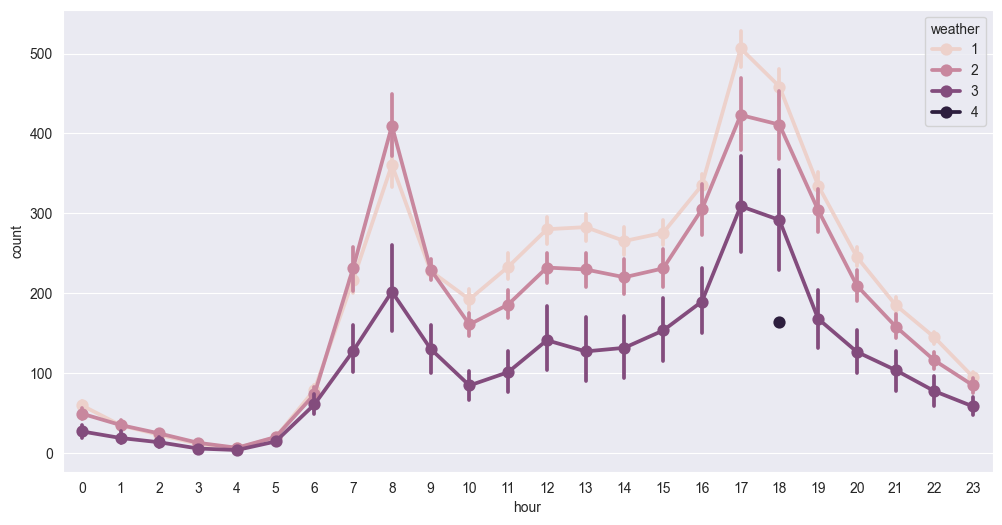

In [26]:
fig = plt.figure(figsize=(12, 6))
sns.pointplot(x="hour", y="count", hue="weather", data=train_df)
plt.show()

weatherとcountの相関係数は-0.128655と低い。\
hourと組み合わせてみてもあまり差異が見えない。\
→　一応天気が良いほど利用数が多い傾向にあるが、少ない差かも。